In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Sector Volatility Analysis: Impact of Major Market Events on U.S. Equity Sectors (2019-2023)

## Technical Documentation

### 1. Technology Stack
- **Python Version**: 3.x
- **Environment**: Jupyter Notebook

### 2. Core Libraries
#### Data Analysis
- `pandas`: Used for:
  - Time series data manipulation
  - Group operations on sector data
  - Statistical calculations
  - Data filtering and transformation
- `numpy`: Implements:
  - Numerical computations
  - Array operations
  - Statistical functions

#### Market Data
- `yfinance`: Provides:
  - Historical stock price data
  - Real-time market data access
  - Corporate actions adjustment

#### Visualization
- `matplotlib`: Creates:
  - Multi-panel sector plots
  - Time series visualizations
  - Event marker annotations
- `seaborn`: Enhances:
  - Statistical visualizations
  - Color palettes
  - Plot styling
- `plotly`: Enables:
  - Interactive data tables
  - Dynamic visualizations
  - Data exploration tools

### 3. Data Processing Pipeline
1. **Data Collection**
   - Fetch historical data using yfinance
   - Handle missing values
   - Adjust for corporate actions

2. **Volatility Calculations**
   - 20-day rolling window
   - Standard deviation calculation
   - Sector aggregation

3. **Event Analysis**
   - Market event identification
   - Time period segmentation
   - Cross-sectional analysis

4. **Visualization Pipeline**
   - Data preparation
   - Plot generation
   - Event annotation
   - Statistical overlay

### 4. Implementation Details
- Rolling window size: 20 days
- Data frequency: Daily
- Date range: 2019-2023
- Number of sectors: 7
- Stocks per sector: 6

### 5. Performance Considerations
- Forward-fill for missing data
- Efficient pandas operations
- Optimized plotting routines
- Memory management for large datasets

In [2]:
# Step 1: Collect stock data using yfinance
# Expanded tickers list with representative stocks from major sectors
tech = ["AAPL", "MSFT", "GOOG", "NVDA", "META", "CRM"]
consumer = ["AMZN", "TSLA", "HD", "MCD", "NKE", "SBUX"]
financials = ["JPM", "BAC", "WFC", "GS", "MS", "C"]
healthcare = ["JNJ", "PFE", "UNH", "MRK", "ABBV", "TMO"]
energy = ["XOM", "CVX", "COP", "SLB", "EOG", "PSX"]
industrials = ["HON", "UNP", "CAT", "DE", "GE", "MMM"]
utilities = ["NEE", "DUK", "SO", "AEP", "EXC", "XEL"]

# Combine all tickers
all_tickers = tech + consumer + financials + healthcare + energy + industrials + utilities

# Convert dates to datetime
start_date = pd.to_datetime('2019-01-01')
end_date = pd.to_datetime('2023-09-18')  # Using 2023 instead of 2025 for historical data

data = yf.download(all_tickers, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))

# Use unadjusted closing prices
if "Close" in data.columns:
    close_data = data["Close"]
    print(close_data.head())
else:
    print("The 'Close' column is not available.")

/var/folders/py/vd9g2b3n1kd5xbfr79bbg8580000gn/T/ipykernel_37736/1927133520.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(all_tickers, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))
[*********************100%***********************]  42 of 42 completed


Ticker           AAPL       ABBV        AEP       AMZN        BAC          C  \
Date                                                                           
2019-01-02  37.575214  66.327293  57.428928  76.956497  21.172947  42.099201   
2019-01-03  33.832451  64.141891  57.295094  75.014000  20.833633  41.336334   
2019-01-04  35.276714  66.208336  57.822601  78.769501  21.698874  43.357529   
2019-01-07  35.198200  67.174690  57.499790  81.475502  21.681913  43.735050   
2019-01-08  35.869202  67.486893  58.208420  82.829002  21.639498  43.617062   

Ticker             CAT        COP         CRM        CVX  ...       SBUX  \
Date                                                      ...              
2019-01-02  108.794144  50.242905  134.138977  82.301765  ...  55.670589   
2019-01-03  104.601799  49.291637  129.042572  80.725471  ...  53.255768   
2019-01-04  110.317856  50.536217  136.523880  82.398430  ...  55.021454   
2019-01-07  110.386726  50.314262  140.739548  83.469109  .

In [3]:
# Step 2: Compute returns, rolling averages, and volatility
 
# Ensure no missing data in close_data
close_data = close_data.fillna(method='ffill').fillna(method='bfill')
 
# Calculate daily returns
daily_returns = close_data.pct_change()
 
# Calculate rolling averages (e.g., 20-day moving average)
rolling_avg = close_data.rolling(window=20).mean()
 
# Calculate rolling volatility (e.g., 20-day standard deviation)
rolling_volatility = close_data.rolling(window=20).std()
 
# Display the first few rows of each
print("Daily Returns:")
print(daily_returns.head())
print("\nRolling Averages:")
print(rolling_avg.head())
print("\nRolling Volatility:")
print(rolling_volatility.head())
 
# Display the entire rolling_avg DataFrame
print("\nFull Rolling Averages:")
print(rolling_avg)


/var/folders/py/vd9g2b3n1kd5xbfr79bbg8580000gn/T/ipykernel_37736/1166167103.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  close_data = close_data.fillna(method='ffill').fillna(method='bfill')


Daily Returns:
Ticker          AAPL      ABBV       AEP      AMZN       BAC         C  \
Date                                                                     
2019-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
2019-01-03 -0.099607 -0.032949 -0.002330 -0.025241 -0.016026 -0.018121   
2019-01-04  0.042689  0.032217  0.009207  0.050064  0.041531  0.048896   
2019-01-07 -0.002226  0.014596 -0.005583  0.034353 -0.000782  0.008707   
2019-01-08  0.019064  0.004648  0.012324  0.016612 -0.001956 -0.002698   

Ticker           CAT       COP       CRM       CVX  ...      SBUX       SLB  \
Date                                                ...                       
2019-01-02       NaN       NaN       NaN       NaN  ...       NaN       NaN   
2019-01-03 -0.038535 -0.018933 -0.037993 -0.019153  ... -0.043377  0.010752   
2019-01-04  0.054646  0.025249  0.057976  0.020724  ...  0.033155  0.039628   
2019-01-07  0.000624 -0.004392  0.030879  0.012994  ...  0.000000  0.02

In [4]:
# View rolling_avg interactively using Plotly DataTable
import plotly.graph_objects as go
 
# Create a DataTable
fig = go.Figure(data=[go.Table(
    header=dict(values=list(rolling_avg.columns), align='left'),
    cells=dict(values=[rolling_avg[col] for col in rolling_avg.columns], align='left')
)])
 
# Show the DataTable
fig.show()

In [5]:
# Step 3: Compare volatility across different sectors

# Define a dictionary mapping tickers to sectors
sector_mapping = {
    # Technology
    "AAPL": "Technology", "MSFT": "Technology", "GOOG": "Technology", "NVDA": "Technology", "META": "Technology", "CRM": "Technology",
    # Consumer Discretionary
    "AMZN": "Consumer Discretionary", "TSLA": "Consumer Discretionary", "HD": "Consumer Discretionary", "MCD": "Consumer Discretionary", "NKE": "Consumer Discretionary", "SBUX": "Consumer Discretionary",
    # Financials
    "JPM": "Financials", "BAC": "Financials", "WFC": "Financials", "GS": "Financials", "MS": "Financials", "C": "Financials",
    # Healthcare
    "JNJ": "Healthcare", "PFE": "Healthcare", "UNH": "Healthcare", "MRK": "Healthcare", "ABBV": "Healthcare", "TMO": "Healthcare",
    # Energy
    "XOM": "Energy", "CVX": "Energy", "COP": "Energy", "SLB": "Energy", "EOG": "Energy", "PSX": "Energy",
    # Industrials
    "HON": "Industrials", "UNP": "Industrials", "CAT": "Industrials", "DE": "Industrials", "GE": "Industrials", "MMM": "Industrials",
    # Utilities
    "NEE": "Utilities", "DUK": "Utilities", "SO": "Utilities", "AEP": "Utilities", "EXC": "Utilities", "XEL": "Utilities"
}

# Create a DataFrame from rolling_volatility
rolling_volatility = rolling_volatility.stack().reset_index()
rolling_volatility.columns = ['Date', 'Ticker', 'Volatility']

# Add sector information
rolling_volatility['Sector'] = rolling_volatility['Ticker'].map(sector_mapping)

# Drop rows with NaN values in the Sector column
rolling_volatility = rolling_volatility.dropna(subset=['Sector'])

# Group by sector and calculate average volatility
sector_volatility = rolling_volatility.groupby('Sector')['Volatility'].mean()

# Display the sector-wise volatility
print("\nSector-wise Volatility:")
print(sector_volatility)


Sector-wise Volatility:
Sector
Consumer Discretionary    5.357219
Energy                    2.581432
Financials                2.973004
Healthcare                4.816537
Industrials               4.706760
Technology                4.990854
Utilities                 1.374981
Name: Volatility, dtype: float64


In [6]:
# Calculate average rolling volatility for each sector over each date
sector_daily_volatility = rolling_volatility.groupby(['Date', 'Sector'])['Volatility'].mean().reset_index()
# Display the first few rows
print(sector_daily_volatility.head())

        Date                  Sector  Volatility
0 2019-01-30  Consumer Discretionary    2.167297
1 2019-01-30                  Energy    1.405928
2 2019-01-30              Financials    3.143845
3 2019-01-30              Healthcare    4.123822
4 2019-01-30             Industrials    3.637697


In [7]:
# View rolling_avg interactively using Plotly DataTable
 
# Create a DataTable
fig = go.Figure(data=[go.Table(
    header=dict(values=list(sector_daily_volatility.columns), align='left'),
    cells=dict(values=[sector_daily_volatility[col] for col in sector_daily_volatility.columns], align='left')
)])
 
# Show the DataTable
fig.show()

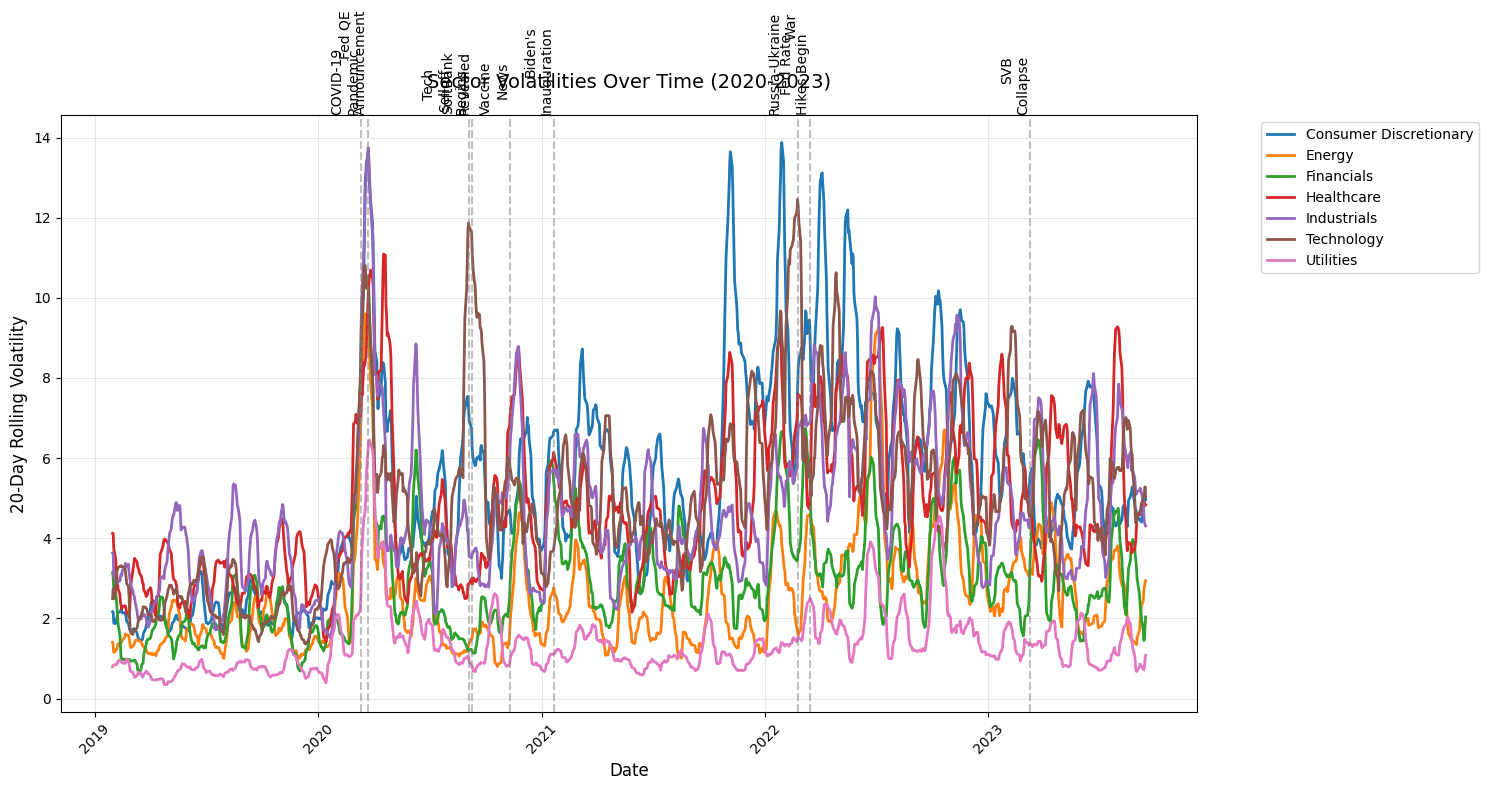


Summary Statistics for Each Sector:

Consumer Discretionary:
Average Volatility: 5.3572
Maximum Volatility: 13.8765
Minimum Volatility: 1.4513

Energy:
Average Volatility: 2.5814
Maximum Volatility: 9.6032
Minimum Volatility: 0.7966

Financials:
Average Volatility: 2.9730
Maximum Volatility: 10.7012
Minimum Volatility: 0.6168

Healthcare:
Average Volatility: 4.8165
Maximum Volatility: 11.0914
Minimum Volatility: 1.4202

Industrials:
Average Volatility: 4.7068
Maximum Volatility: 13.7471
Minimum Volatility: 1.5163

Technology:
Average Volatility: 4.9909
Maximum Volatility: 12.4538
Minimum Volatility: 1.3590

Utilities:
Average Volatility: 1.3750
Maximum Volatility: 6.4517
Minimum Volatility: 0.3447


In [8]:
# Create a plot of sector volatilities over time
plt.figure(figsize=(15, 8))

# Plot each sector with a different color and line style
for sector in sector_daily_volatility['Sector'].unique():
    sector_data = sector_daily_volatility[sector_daily_volatility['Sector'] == sector]
    plt.plot(sector_data['Date'], sector_data['Volatility'], label=sector, linewidth=2)

# Customize the plot
plt.title('Sector Volatilities Over Time (2020-2023)', fontsize=14, pad=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('20-Day Rolling Volatility', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add major events as vertical lines with annotations
events = [
    ('2020-03-11', 'COVID-19\nPandemic'),
    ('2020-03-23', 'Fed QE\nAnnouncement'),
    ('2020-11-09', 'Vaccine\nNews'),
    ('2020-09-03', 'Tech\nSelloff\nBegins'),
    ('2020-09-08', 'SoftBank\nRevealed'),
    ('2022-02-24', 'Russia-Ukraine\nWar'),
    ('2022-03-16', 'Fed Rate\nHikes Begin'),
    ('2023-03-10', 'SVB\nCollapse'),
    ('2021-01-20', 'Biden\'s\nInauguration')
]

# Add vertical lines for significant events
for date, label in events:
    event_date = pd.to_datetime(date)
    if event_date >= sector_daily_volatility['Date'].min() and event_date <= sector_daily_volatility['Date'].max():
        plt.axvline(x=event_date, color='gray', linestyle='--', alpha=0.5)
        plt.text(event_date, plt.ylim()[1], label, 
                rotation=90, verticalalignment='bottom', horizontalalignment='right')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

# Print summary statistics for each sector
print("\nSummary Statistics for Each Sector:")
for sector in sector_daily_volatility['Sector'].unique():
    sector_stats = sector_daily_volatility[sector_daily_volatility['Sector'] == sector]['Volatility'].describe()
    print(f"\n{sector}:")
    print(f"Average Volatility: {sector_stats['mean']:.4f}")
    print(f"Maximum Volatility: {sector_stats['max']:.4f}")
    print(f"Minimum Volatility: {sector_stats['min']:.4f}")

Looking at this graph we can see clearly that the most notable event was the COVID-19 pandemic. 

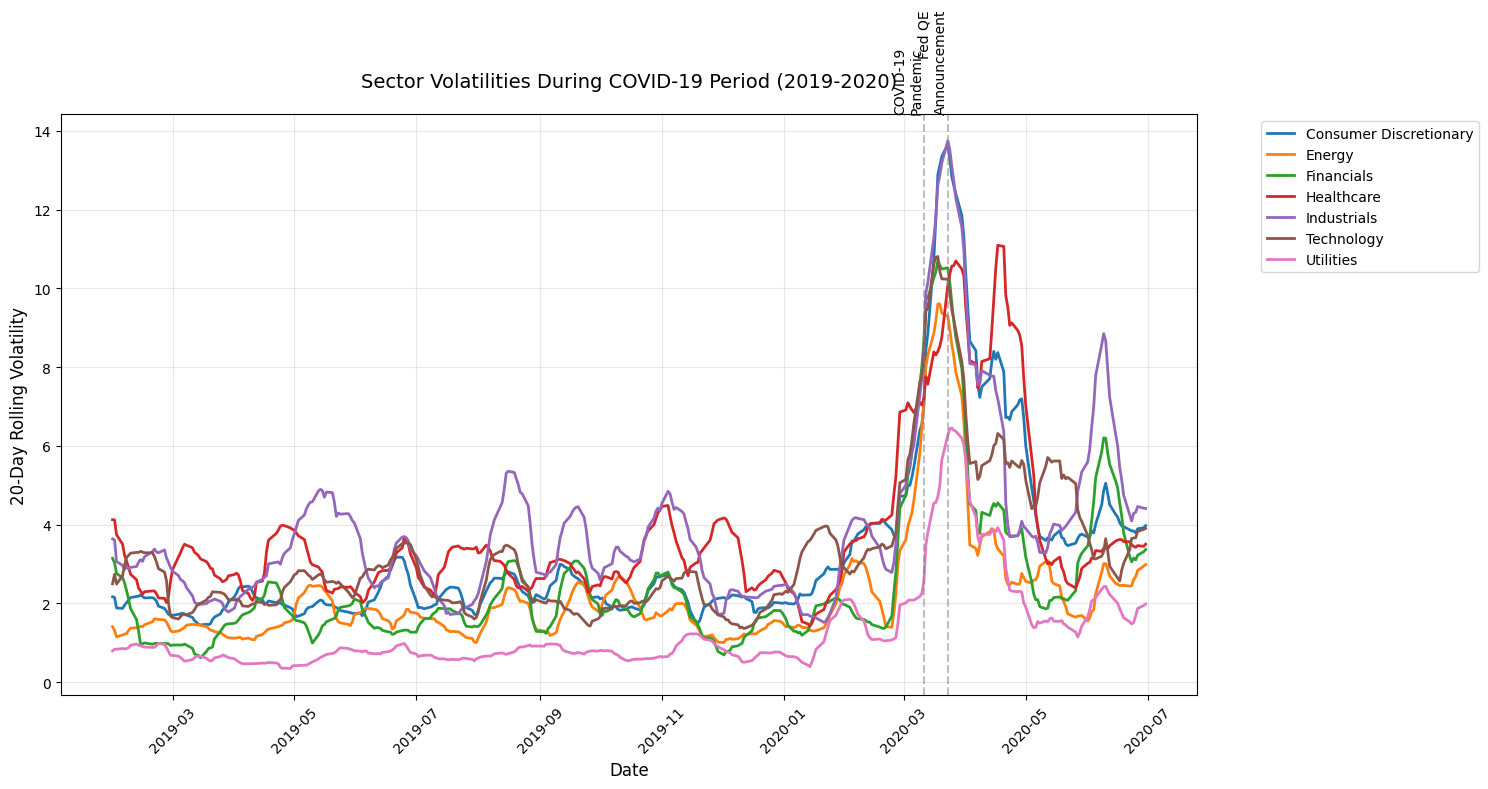


Summary Statistics for COVID-19 Period (Jan-Jun 2020):

Consumer Discretionary:
Average Volatility: 5.3611
Maximum Volatility: 13.6489
Minimum Volatility: 1.9834
Peak Date: 2020-03-23

Energy:
Average Volatility: 3.3042
Maximum Volatility: 9.6032
Minimum Volatility: 1.2935
Peak Date: 2020-03-19

Financials:
Average Volatility: 3.9225
Maximum Volatility: 10.7012
Minimum Volatility: 1.1894
Peak Date: 2020-03-18

Healthcare:
Average Volatility: 5.1595
Maximum Volatility: 11.0914
Minimum Volatility: 1.4202
Peak Date: 2020-04-17

Industrials:
Average Volatility: 5.4517
Maximum Volatility: 13.7471
Minimum Volatility: 1.5163
Peak Date: 2020-03-23

Technology:
Average Volatility: 4.9277
Maximum Volatility: 10.8066
Minimum Volatility: 2.2791
Peak Date: 2020-03-18

Utilities:
Average Volatility: 2.2940
Maximum Volatility: 6.4517
Minimum Volatility: 0.3933
Peak Date: 2020-03-25


In [9]:
# Create a plot focusing on the COVID-19 period
plt.figure(figsize=(15, 8))

# Plot each sector with a different color and line style
for sector in sector_daily_volatility['Sector'].unique():
    sector_data = sector_daily_volatility[sector_daily_volatility['Sector'] == sector]
    # Filter data for COVID-19 period (2019 to mid-2020)
    mask = (sector_data['Date'] >= '2019-01-01') & (sector_data['Date'] <= '2020-06-30')
    sector_data = sector_data[mask]
    plt.plot(sector_data['Date'], sector_data['Volatility'], label=sector, linewidth=2)

# Customize the plot
plt.title('Sector Volatilities During COVID-19 Period (2019-2020)', fontsize=14, pad=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('20-Day Rolling Volatility', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add major events as vertical lines with annotations
covid_events = [
    ('2020-03-11', 'COVID-19\nPandemic'),
    ('2020-03-23', 'Fed QE\nAnnouncement')
]

# Add vertical lines for significant events
for date, label in covid_events:
    event_date = pd.to_datetime(date)
    plt.axvline(x=event_date, color='gray', linestyle='--', alpha=0.5)
    plt.text(event_date, plt.ylim()[1], label, 
            rotation=90, verticalalignment='bottom', horizontalalignment='right')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

# Print summary statistics for COVID-19 period
print("\nSummary Statistics for COVID-19 Period (Jan-Jun 2020):")
covid_period = (sector_daily_volatility['Date'] >= '2020-01-01') & (sector_daily_volatility['Date'] <= '2020-06-30')
covid_data = sector_daily_volatility[covid_period]
for sector in covid_data['Sector'].unique():
    sector_stats = covid_data[covid_data['Sector'] == sector]['Volatility'].describe()
    print(f"\n{sector}:")
    print(f"Average Volatility: {sector_stats['mean']:.4f}")
    print(f"Maximum Volatility: {sector_stats['max']:.4f}")
    print(f"Minimum Volatility: {sector_stats['min']:.4f}")
    print(f"Peak Date: {covid_data[covid_data['Sector'] == sector].loc[covid_data[covid_data['Sector'] == sector]['Volatility'].idxmax(), 'Date'].strftime('%Y-%m-%d')}")

# Sector Volatility Analysis

The graph above shows the 20-day rolling volatility for each market sector from 2020 to 2023. Key observations:

1. **Overall Patterns:**
   - Utilities consistently show the lowest volatility (defensive sector)
   - Technology and Consumer Discretionary often show higher volatility
   - All sectors show spikes during major market events

2. **Major Events Impact:**
   - COVID-19 Pandemic (March 2020): Massive spike across all sectors
   - Fed QE Announcement: Helped stabilize volatility
   - Vaccine News: Led to sector rotation and varying volatility patterns
   - Russia-Ukraine War: Created new volatility patterns
   - Fed Rate Hikes: Increased volatility, especially in growth sectors
   - SVB Collapse: Particularly impacted financial sector volatility

3. **Sector Characteristics:**
   - Defensive sectors (Utilities, Healthcare) tend to have lower baseline volatility
   - Cyclical sectors show more sensitivity to economic events
   - Technology sector shows sensitivity to interest rate changes
   - Energy sector volatility often reflects global geopolitical events

The summary statistics below the graph show the average, maximum, and minimum volatility for each sector, helping quantify these observations.

next zoom in on sections
and dissect the time-series

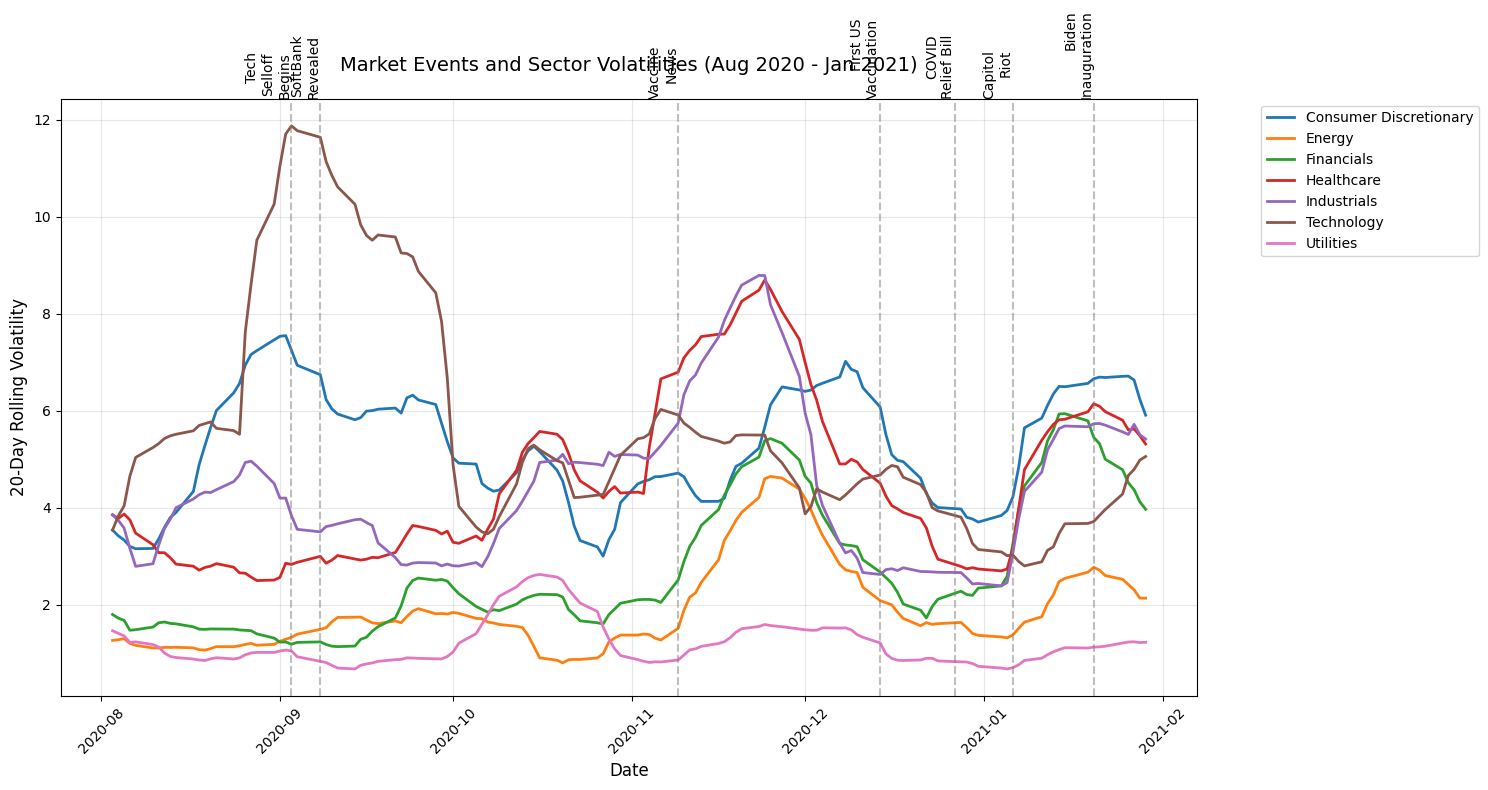


Summary Statistics for Tech Selloff Period (Sep 1-15, 2020):

Summary Statistics for Vaccine News Period (Nov 9-23, 2020):

Consumer Discretionary:
During Tech Selloff:
Average Volatility: 6.5844
Maximum Volatility: 7.5453

During Vaccine News:
Average Volatility: 4.5460
Maximum Volatility: 5.2246

Energy:
During Tech Selloff:
Average Volatility: 1.5104
Maximum Volatility: 1.7417

During Vaccine News:
Average Volatility: 2.8948
Maximum Volatility: 4.2081

Financials:
During Tech Selloff:
Average Volatility: 1.1960
Maximum Volatility: 1.2840

During Vaccine News:
Average Volatility: 3.8965
Maximum Volatility: 5.0397

Healthcare:
During Tech Selloff:
Average Volatility: 2.8735
Maximum Volatility: 3.0099

During Vaccine News:
Average Volatility: 7.6054
Maximum Volatility: 8.4819

Industrials:
During Tech Selloff:
Average Volatility: 3.7686
Maximum Volatility: 4.1950

During Vaccine News:
Average Volatility: 7.4195
Maximum Volatility: 8.7865

Technology:
During Tech Selloff:
Average Volat

In [10]:
# Create a plot focusing on the COVID-19 period
plt.figure(figsize=(15, 8))

# Plot each sector with a different color and line style
for sector in sector_daily_volatility['Sector'].unique():
    sector_data = sector_daily_volatility[sector_daily_volatility['Sector'] == sector]
    # Filter data for COVID-19 period (2019 to mid-2020)
    mask = (sector_data['Date'] >= '2020-08-01') & (sector_data['Date'] <= '2021-01-30')
    sector_data2 = sector_data[mask]
    plt.plot(sector_data2['Date'], sector_data2['Volatility'], label=sector, linewidth=2)

# Customize the plot
plt.title('Market Events and Sector Volatilities (Aug 2020 - Jan 2021)', fontsize=14, pad=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('20-Day Rolling Volatility', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add major events as vertical lines with annotations
events = [
    ('2020-09-03', 'Tech\nSelloff\nBegins'),
    ('2020-09-08', 'SoftBank\nRevealed'),
    ('2020-11-09', 'Vaccine\nNews'),
    ('2020-12-14', 'First US\nVaccination'),
    ('2020-12-27', 'COVID\nRelief Bill'),
    ('2021-01-06', 'Capitol\nRiot'),
    ('2021-01-20', 'Biden\nInauguration')
]

# Add vertical lines for significant events
for date, label in events:
    event_date = pd.to_datetime(date)
    plt.axvline(x=event_date, color='gray', linestyle='--', alpha=0.5)
    plt.text(event_date, plt.ylim()[1], label, 
            rotation=90, verticalalignment='bottom', horizontalalignment='right')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

# Print summary statistics for key periods
print("\nSummary Statistics for Tech Selloff Period (Sep 1-15, 2020):")
tech_period = (sector_daily_volatility['Date'] >= '2020-09-01') & (sector_daily_volatility['Date'] <= '2020-09-15')
tech_data = sector_daily_volatility[tech_period]

print("\nSummary Statistics for Vaccine News Period (Nov 9-23, 2020):")
vaccine_period = (sector_daily_volatility['Date'] >= '2020-11-09') & (sector_daily_volatility['Date'] <= '2020-11-23')
vaccine_data = sector_daily_volatility[vaccine_period]

for sector in tech_data['Sector'].unique():
    print(f"\n{sector}:")
    
    # Tech Selloff Statistics
    tech_stats = tech_data[tech_data['Sector'] == sector]['Volatility'].describe()
    print("During Tech Selloff:")
    print(f"Average Volatility: {tech_stats['mean']:.4f}")
    print(f"Maximum Volatility: {tech_stats['max']:.4f}")
    
    # Vaccine News Statistics
    vaccine_stats = vaccine_data[vaccine_data['Sector'] == sector]['Volatility'].describe()
    print("\nDuring Vaccine News:")
    print(f"Average Volatility: {vaccine_stats['mean']:.4f}")
    print(f"Maximum Volatility: {vaccine_stats['max']:.4f}")

# Analysis of Sector Volatility During Major Events

The graph above shows how different sectors responded to major market events from 2020 onwards. Some key observations:

1. **COVID-19 Pandemic (March 2020)**: 
   - All sectors experienced a significant spike in volatility
   - Travel and energy sectors likely showed highest volatility due to lockdowns
   - Utilities typically showed lower volatility as a defensive sector

2. **Post-Vaccine Announcement (November 2020)**:
   - Market volatility generally decreased
   - Cyclical sectors (Consumer Discretionary, Industrials) may show changing patterns

3. **2022-2023 Events**:
   - Fed rate hikes impacting all sectors
   - Banking crisis affecting Financial sector volatility
   - Tech sector volatility during the growth stock selloff

The interactive plot allows you to:
- Zoom into specific time periods
- Hover over lines to see exact volatility values
- Compare sectors during specific events
- Use the range selector to focus on different time periods

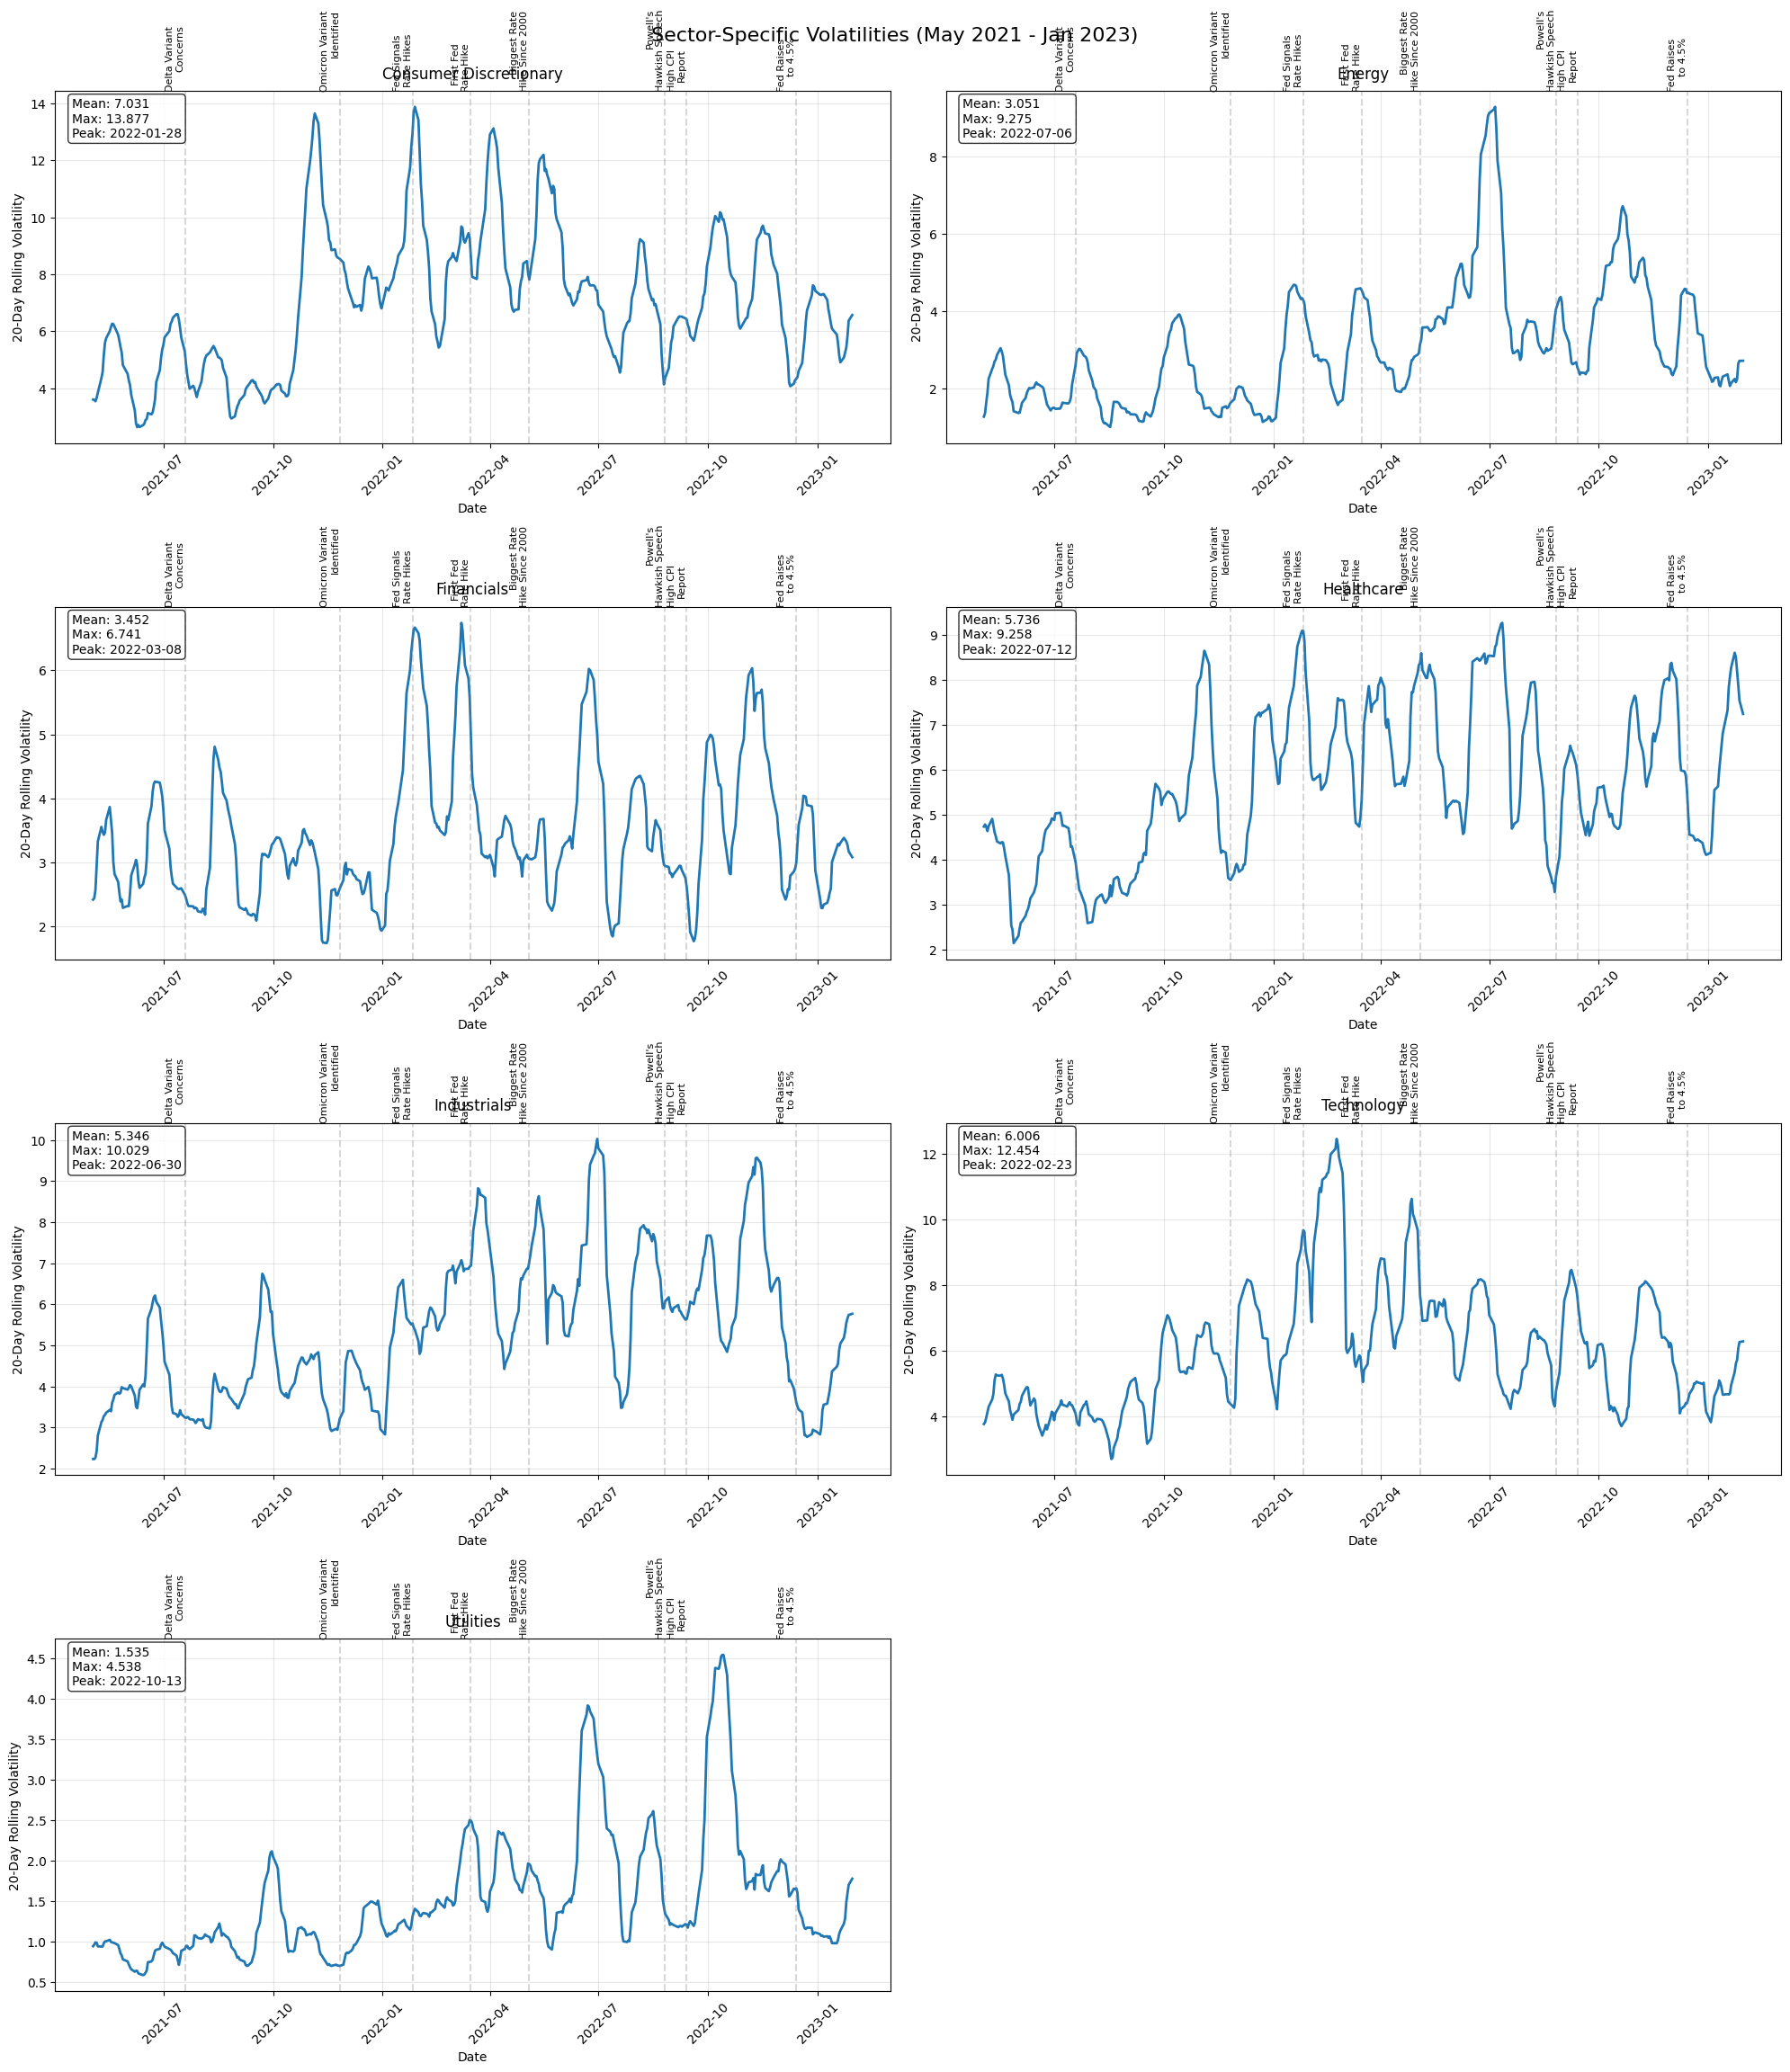


Detailed Statistics by Sector (May 2021 - Jan 2023):

Consumer Discretionary:
Average Volatility: 7.0314
Maximum Volatility: 13.8765
Minimum Volatility: 2.6338
Peak Date: 2022-01-28

Top 3 Highest Volatility Days:
Date: 2022-01-28, Volatility: 13.8765
Date: 2022-01-27, Volatility: 13.6929
Date: 2021-11-05, Volatility: 13.6441

Energy:
Average Volatility: 3.0513
Maximum Volatility: 9.2751
Minimum Volatility: 1.0074
Peak Date: 2022-07-06

Top 3 Highest Volatility Days:
Date: 2022-07-06, Volatility: 9.2751
Date: 2022-07-05, Volatility: 9.2115
Date: 2022-07-01, Volatility: 9.1126

Financials:
Average Volatility: 3.4519
Maximum Volatility: 6.7408
Minimum Volatility: 1.7446
Peak Date: 2022-03-08

Top 3 Highest Volatility Days:
Date: 2022-03-08, Volatility: 6.7408
Date: 2022-01-28, Volatility: 6.6672
Date: 2022-01-27, Volatility: 6.6361

Healthcare:
Average Volatility: 5.7364
Maximum Volatility: 9.2584
Minimum Volatility: 2.1519
Peak Date: 2022-07-12

Top 3 Highest Volatility Days:
Date: 202

In [15]:
# Create subplots for each sector
sectors = sector_daily_volatility['Sector'].unique()
fig, axs = plt.subplots(4, 2, figsize=(20, 24))  # 4 rows, 2 columns for 7 sectors
fig.suptitle('Sector-Specific Volatilities (May 2021 - Jan 2023)', fontsize=16, y=0.95)

# Flatten axs for easier iteration
axs_flat = axs.flatten()

# Events that affected the market
events = [
    ('2021-07-19', 'Delta Variant\nConcerns'),
    ('2021-11-26', 'Omicron Variant\nIdentified'),
    ('2022-01-26', 'Fed Signals\nRate Hikes'),
    ('2022-03-16', 'First Fed\nRate Hike'),
    ('2022-05-04', 'Biggest Rate\nHike Since 2000'),
    ('2022-08-26', 'Powell\'s\nHawkish Speech'),
    ('2022-09-13', 'High CPI\nReport'),
    ('2022-12-14', 'Fed Raises\nto 4.5%')
]

# Plot each sector in its own subplot
for idx, sector in enumerate(sectors):
    sector_data = sector_daily_volatility[sector_daily_volatility['Sector'] == sector]
    mask = (sector_data['Date'] >= '2021-05-01') & (sector_data['Date'] <= '2023-01-30')
    sector_data = sector_data[mask]
    
    # Plot the volatility line
    axs_flat[idx].plot(sector_data['Date'], sector_data['Volatility'], 
                      label=sector, linewidth=2)
    
    # Add events as vertical lines
    for date, label in events:
        event_date = pd.to_datetime(date)
        if event_date >= sector_data['Date'].min() and event_date <= sector_data['Date'].max():
            axs_flat[idx].axvline(x=event_date, color='gray', linestyle='--', alpha=0.3)
            axs_flat[idx].text(event_date, axs_flat[idx].get_ylim()[1], label,
                             rotation=90, verticalalignment='bottom', 
                             horizontalalignment='right', fontsize=8)
    
    # Customize each subplot
    axs_flat[idx].set_title(sector, fontsize=12, pad=10)
    axs_flat[idx].set_xlabel('Date', fontsize=10)
    axs_flat[idx].set_ylabel('20-Day Rolling Volatility', fontsize=10)
    axs_flat[idx].grid(True, alpha=0.3)
    axs_flat[idx].tick_params(axis='x', rotation=45)
    
    # Add summary statistics as text
    stats = sector_data['Volatility'].describe()
    max_date = sector_data.loc[sector_data['Volatility'].idxmax(), 'Date']
    stats_text = f'Mean: {stats["mean"]:.3f}\nMax: {stats["max"]:.3f}\nPeak: {max_date.strftime("%Y-%m-%d")}'
    axs_flat[idx].text(0.02, 0.98, stats_text,
                      transform=axs_flat[idx].transAxes,
                      verticalalignment='top',
                      bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Remove any extra subplots
for idx in range(len(sectors), len(axs_flat)):
    fig.delaxes(axs_flat[idx])

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.subplots_adjust(top=0.92)

# Show the plot
plt.show()

# Print detailed statistics for each sector
print("\nDetailed Statistics by Sector (May 2021 - Jan 2023):")
period_mask = (sector_daily_volatility['Date'] >= '2021-05-01') & (sector_daily_volatility['Date'] <= '2023-01-30')

for sector in sectors:
    sector_data = sector_daily_volatility[period_mask & (sector_daily_volatility['Sector'] == sector)]
    stats = sector_data['Volatility'].describe()
    max_date = sector_data.loc[sector_data['Volatility'].idxmax(), 'Date']
    
    print(f"\n{sector}:")
    print(f"Average Volatility: {stats['mean']:.4f}")
    print(f"Maximum Volatility: {stats['max']:.4f}")
    print(f"Minimum Volatility: {stats['min']:.4f}")
    print(f"Peak Date: {max_date.strftime('%Y-%m-%d')}")
    
    # Print top 3 highest volatility periods for each sector
    print("\nTop 3 Highest Volatility Days:")
    top_3_days = sector_data.nlargest(3, 'Volatility')[['Date', 'Volatility']]
    for _, row in top_3_days.iterrows():
        print(f"Date: {row['Date'].strftime('%Y-%m-%d')}, Volatility: {row['Volatility']:.4f}")

In [ ]:
# Potential Correlation Analysis Approaches:

"""
1. Cross-Sector Volatility Correlations
- Calculate correlation matrix between sector volatilities
- Identify which sectors tend to move together
- Find sectors that provide diversification benefits

2. Lag Correlation Analysis
- Study if volatility in one sector leads another
- Identify potential spillover effects
- Calculate lead-lag relationships between sectors

3. Event-Based Correlation Changes
- Compare correlation matrices before/after major events
- Analyze how sector relationships change during stress periods
- Study correlation stability over time

4. Market Condition Analysis
- Compare correlations in high vs low volatility periods
- Study sector behavior in different market regimes
- Analyze correlation changes during Fed policy shifts

5. Macro Factor Correlations
- Correlate sector volatilities with:
  * Interest rate changes
  * Inflation metrics
  * Economic indicators
  * Currency movements

6. Volatility Clustering Analysis
- Study autocorrelation in sector volatilities
- Identify persistence in volatility
- Analyze volatility transmission between sectors

Would you like me to implement any of these correlation analyses?
"""